In [131]:
ls ../input

NLP_data_list_0715.csv*  test_a.csv*  test_a_sample_submit.csv*  train_set.csv*


In [3]:
import re
import pandas as pd

In [4]:
train_df = pd.read_csv('../input/train_set.csv', sep='\t', nrows=20000)
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


# 1. EDA

1. 新闻文本长度分布
2. 新闻文本类别分布
3. 字符分布

## 1.1 新闻文本长度分布

In [134]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))

In [135]:
print(train_df['text_len'].describe())

count    20000.00000
mean       904.61785
std        961.69081
min          2.00000
25%        375.00000
50%        676.00000
75%       1125.00000
max      44665.00000
Name: text_len, dtype: float64


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Histogram of char count')

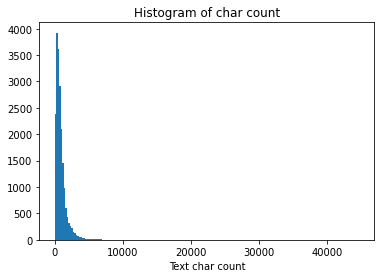

In [136]:
%pylab inline
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

## 1.2 新闻文本类别分布
1. 画图 

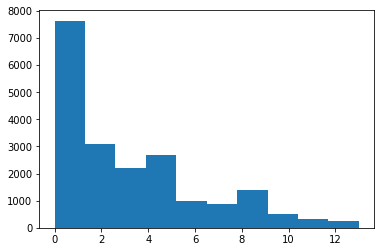

In [137]:
_ = plt.hist(train_df['label'])

In [138]:
class_dict = {'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

In [139]:
class_dict_r = dict(map(reversed, class_dict.items()))
class_dict_r

{0: '科技',
 1: '股票',
 2: '体育',
 3: '娱乐',
 4: '时政',
 5: '社会',
 6: '教育',
 7: '财经',
 8: '家居',
 9: '游戏',
 10: '房产',
 11: '时尚',
 12: '彩票',
 13: '星座'}

In [140]:
train_df['class'] = train_df['label'].apply(lambda x: class_dict_r[x])

Text(0.5, 0, 'category')

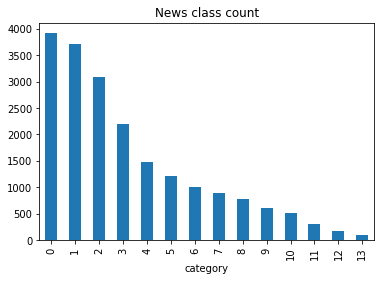

In [141]:
_ = train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

## 1.3 字符分布

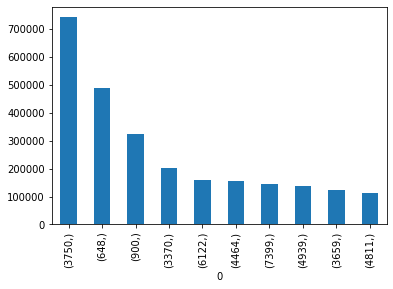

In [142]:
_ = pd.DataFrame(' '.join(train_df['text']).split()).value_counts().head(10).plot(kind='bar')

task 1: 假设3750和648是标点符号，计算每篇新闻平均有多少个句子。

In [146]:
train_df['sentence_count'] = train_df['text'].apply(lambda x: len(re.split('3750|648',x)))

In [147]:
train_df.head()

,label,text,text_len,class,sentence_count
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,体育,91
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,时尚,37
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,娱乐,49
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,体育,131
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,娱乐,22


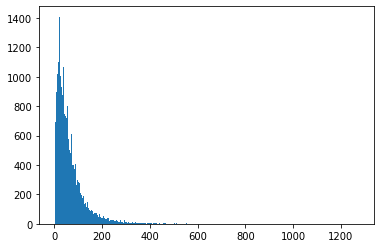

In [148]:
_ = plt.hist(train_df['sentence_count'],bins=300)

In [149]:
train_df['sentence_count'].mean()

64.0329

平均每条新闻有64.47个句子。

In [150]:
task 2: 统计每类新闻中除标点符号之外出现次数最多的字符

SyntaxError: invalid syntax (<ipython-input-150-bf18f373c273>, line 1)

In [151]:
train_df[train_df['label']==0].head()

,label,text,text_len,class,sentence_count
10,0,3659 3659 1903 1866 4326 4744 7239 3479 4261 4...,983,科技,63
13,0,4630 2210 1641 1854 1641 4543 3017 4409 5430 6...,191,科技,13
14,0,1103 6835 3433 2107 5165 7543 3598 5229 1946 2...,723,科技,45
20,0,6569 4690 2663 5391 1315 3987 1519 4893 7539 3...,1178,科技,121
31,0,2400 4411 4559 3464 1407 3154 6714 4516 5264 5...,899,科技,65


In [152]:
x=0
pd.DataFrame(' '.join(train_df[train_df['label']==x]['text']).split()).value_counts()

3750    126914
648      97095
900      58260
3370     49790
2465     30701
         ...  
1559         1
2141         1
4242         1
4240         1
7500         1
Length: 4291, dtype: int64

In [153]:
for x in range(14):
    print (x,class_dict_r[x])
    print(pd.DataFrame(' '.join(train_df[train_df['label']==x]['text']).replace('3750','').replace('648','').split()).value_counts().head(1))

0 科技
900    58260
dtype: int64
1 股票
3370    62630
dtype: int64
2 体育
900    59694
dtype: int64
3 娱乐
900    29621
dtype: int64
4 时政
900    18741
dtype: int64
5 社会
900    29617
dtype: int64
6 教育
900    21766
dtype: int64
7 财经
900    18554
dtype: int64
8 家居
900    9833
dtype: int64
9 游戏
900    7477
dtype: int64
10 房产
900    7412
dtype: int64
11 时尚
900    3716
dtype: int64
12 彩票
4464    5036
dtype: int64
13 星座
900    1129
dtype: int64


# 2 基于机器学习的文本分类

1. TF-IDF的原理和使用
2. 使用sklearn完成文本分类

机器学习分类:
1. Supervised learning 
   - Classification
   - Regression
2. Unsupervised learning
   - Dimension reduction
   - Generative networks
   - Clustering
3. Semi-supervised learning
4. Reinforcement learning

## 2.1 文本表示方法
1. One-hot
2. Bag of words (Count Vectors)
3. N-gram
4. TF-IDF

## 2.2 基于机器学习的文本分类
1. Count Vectors + RidgeClassifier
2. TF-IDF + RidgeClassifier

### 2.2.1 Count Vectors + RidgeClassifier
使用sklearn中的CountVectorizer和RidgeClassifier函数实现

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report

In [10]:
vectorizer = CountVectorizer()
corpus = train_df['text']
train = vectorizer.fit_transform(corpus).toarray()

In [156]:
train.shape

(20000, 5689)

In [157]:
len(set(' '.join(train_df['text']).split()))

5697

In [159]:
clf = RidgeClassifier()

In [160]:
train_df.head()

,label,text,text_len,class,sentence_count
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,体育,91
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,时尚,37
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,娱乐,49
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,体育,131
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,娱乐,22


In [11]:
split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
train_data_y = train_df['label'][:train_size].values.astype('int32')
train_data_x = train[:train_size,:].astype('int32')

test_data_y = train_df['label'][train_size:].values.astype('int32')
test_data_x = train[train_size:,:].astype('int32')

In [178]:
clf = clf.fit(train_data_x, train_data_y)

In [180]:
predicted_y = clf.predict(test_data_x)

In [183]:
print(classification_report(predicted_y,test_data_y))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       449
           1       0.85      0.68      0.75       409
           2       0.88      0.72      0.79       355
           3       0.71      0.81      0.75       200
           4       0.70      0.73      0.72       130
           5       0.52      0.77      0.62        99
           6       0.69      0.85      0.76        85
           7       0.61      0.83      0.70        75
           8       0.56      0.65      0.60        75
           9       0.59      0.92      0.72        37
          10       0.75      0.91      0.82        54
          11       0.47      0.79      0.59        19
          12       0.50      1.00      0.67         6
          13       0.55      0.86      0.67         7

    accuracy                           0.75      2000
   macro avg       0.66      0.80      0.71      2000
weighted avg       0.77      0.75      0.75      2000



### 2.2.1 TF-IDF + RidgeClassifier
使用sklearn中的TfidfVectorizer和RidgeClassifier实现

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [13]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000).fit_transform(train_df['text']).toarray()
train_tfidf.shape

(20000, 3000)

In [14]:
split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
train_data_tfidf_y = train_df['label'][:train_size].values
train_data_tfidf_x = train_tfidf[:train_size,:]
test_data_tfidf_y = train_df['label'][train_size:].values
test_data_tfidf_x = train_tfidf[train_size:,:]

clf_tfidf = RidgeClassifier().fit(train_data_tfidf_x,train_data_tfidf_y)
predicted_tfidf_y = clf_tfidf.predict(test_data_tfidf_x)
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.8874095355608284


task 1： 改变TF-IDF参数，验证精度

In [249]:
train_tfidf = TfidfVectorizer().fit_transform(train_df['text']).toarray()
train_tfidf.shape

(20000, 5689)

In [15]:
split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
train_data_tfidf_y = train_df['label'][:train_size].values
train_data_tfidf_x = train_tfidf[:train_size,:]
test_data_tfidf_y = train_df['label'][train_size:].values
test_data_tfidf_x = train_tfidf[train_size:,:]

clf_tfidf = RidgeClassifier().fit(train_data_tfidf_x,train_data_tfidf_y)
predicted_tfidf_y = clf_tfidf.predict(test_data_tfidf_x)
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.8874095355608284


2. 

In [16]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=2000).fit_transform(train_df['text']).toarray()
print(train_tfidf.shape)

split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
test_data_tfidf_y = train_df['label'][train_size:].values

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

(20000, 2000)
0.8676361957864771


In [256]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=1000).fit_transform(train_df['text']).toarray()
print(train_tfidf.shape)

split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
test_data_tfidf_y = train_df['label'][train_size:].values

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

(20000, 1000)
0.8370254652824473


In [257]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=4000).fit_transform(train_df['text']).toarray()

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.8968761837026192


In [258]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=5000).fit_transform(train_df['text']).toarray()

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.9008330481271971


In [259]:
train_tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000).fit_transform(train_df['text']).toarray()

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.9047890129332293


In [17]:
train_tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=5000).fit_transform(train_df['text']).toarray()

clf_tfidf = RidgeClassifier().fit(train_tfidf[:train_size,:],train_df['label'][:train_size].values)
predicted_tfidf_y = clf_tfidf.predict(train_tfidf[train_size:,:])
print(f1_score(predicted_tfidf_y, test_data_tfidf_y, average='macro'))

0.8994379043394298
